# Задача №5

![image.png](images/problem5.png)

Подключаем необходимые библиотеки

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

$$
A = 
\begin{pmatrix}
b_0 & c_0 & 0 & 0 & \cdots & 0 & \vert & d_0 \\
a_0 & b_1 & c_1 & 0 & \cdots & 0 & \vert & d_1 \\
0 & a_1 & b_2 & c_2 & \cdots & 0 & \vert & d_2 \\
\vdots & \vdots & \vdots & \ddots & \ddots & \vdots & \vert & \vdots \\
0 & \cdots & 0 & a_{N-3} & b_{N-2} & c_{N-2} & \vert & d_{N-2} \\
0 & \cdots & 0 & 0 & a_{N-2} & b_{N-1} & \vert & d_{N-1} \\
\end{pmatrix}
$$

In [55]:
def solve_tridiagonal(a: np.array, b: np.array, c: np.array, d: np.array):
    
    n = len(d)
    if (len(a) != n - 1 or len(b) != n  or len(c) != n - 1):
        raise ValueError()
    
    ac, bc, cc, dc = map(np.array, (a, b, c, d))  # Copy arrays
    # Прямой проход
    for i in range(1, n):

        if bc[i - 1] == 0:
            raise ValueError("Метод не применим или определитель равен нулю")
        
        mc = ac[i - 1] / bc[i - 1]
        bc[i] = bc[i] - mc * cc[i - 1]
        dc[i] = dc[i] - mc * dc[i - 1]

    xc = bc
    
    if bc[-1] == 0:
        raise ValueError("Метод не применим или определитель равен нулю")
    
    xc[-1] = dc[-1] / bc[-1]
    
    # Обратный проход
    for i in range(n-2, -1, -1):
        xc[i] = (dc[i] - cc[i] * xc[i + 1]) / bc[i]

    return xc

In [56]:
def func(x):
    return np.sin(x)

$$f'(x_i) \approx \frac{f_{i} - f_{i-1}}{h}$$
$$f'(x_i) \approx \frac{f_{i+1} - f_{i}}{h}$$

$$f''(x_i) \approx \frac{1}{h^2} \left( f_{i-1} - 2f_i + f_{i+1} \right)$$


In [57]:
k = np.array([[1, 0], [1, 0]])
r = np.array([0, 0])
k[1][0]

1

In [58]:
def solve(func, left, right, k, r, N=20):
    h = (right - left) / (N - 1)  # шаг сетки
    x = np.linspace(left, right, N)  # узлы сетки

    # Коэффициенты трехдиагональной матрицы
    a = np.zeros(N - 1)
    b = np.zeros(N)
    c = np.zeros(N - 1)
    d = func(x) # правая часть уравнения

    lambda2 = 1 # коэффициент перед y'' 
    a += lambda2 / h**2
    b -= 2 * lambda2 / h**2
    c += lambda2 / h**2
    

    # Левая граница
    b[0] = k[0][0] - k[0][1] / h
    c[0] = k[0][1] / h
    d[0] = r[0]

    # Правая граница
    a[-1] = -k[1][1] / h
    b[-1] = k[1][0] + k[1][1] / h
    d[-1] = r[1]


    # Решение системы методом прогонки
    return solve_tridiagonal(a, b, c, d), x


Граничные условия задаются системой:
$$
\begin{cases}
k_{11} * y(left) + k_{12} * y'(left) = r_1 \\
k_{21} * y(right) + k_{22} * y'(right) = r_2
\end{cases}
$$

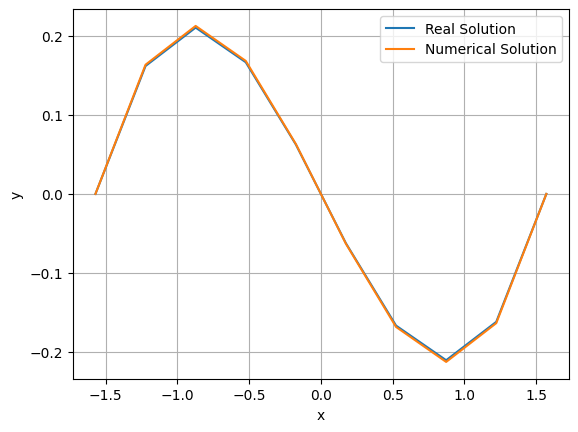

In [60]:
k = [[1, 0], [1, 0]]
r = [0,  0]
y_inner, x = solve(func, left=-np.pi/2, right=np.pi/2, k=k, r=r, N = 10)

plt.plot(x, -np.sin(x)+x/np.pi*2, label='Real Solution')
plt.plot(x, y_inner, label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# ошибка, так как нельзя однозначно построить функцию не зная ее значение ни в одной точке
k = [[0, 1], [0, 1]]
r = [0,  0]
y_inner, x = solve(func, left=-np.pi/2, right=np.pi/2, k=k, r=r, N = 10)

ValueError: Метод не применим или определитель равен нулю

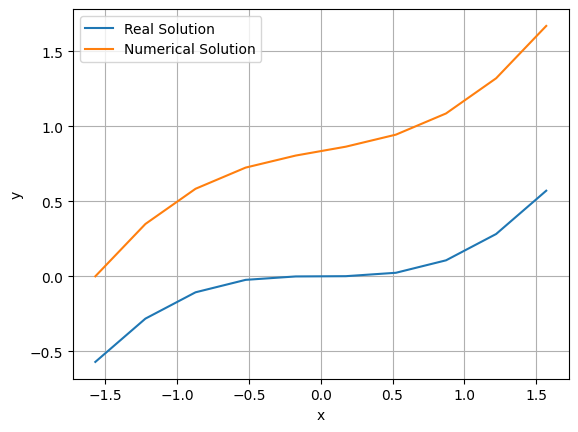

In [69]:
k = [[1, 0], [0, 1]]
r = [0,  1]
y_inner, x = solve(func, left=-np.pi/2, right=np.pi/2, k=k, r=r, N = 10)

plt.plot(x, -np.sin(x) + x + np.pi/2 - np.pi/2, label='Real Solution')
plt.plot(x, y_inner, label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
def max_norm(actual, expected):
    diff = np.abs(actual - expected)
    return np.max(diff)

 60%|██████    | 6/10 [00:00<00:00, 42.86it/s]

148
450
1369
4160
12637
38390
116618
354256
1076137
3269017


100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


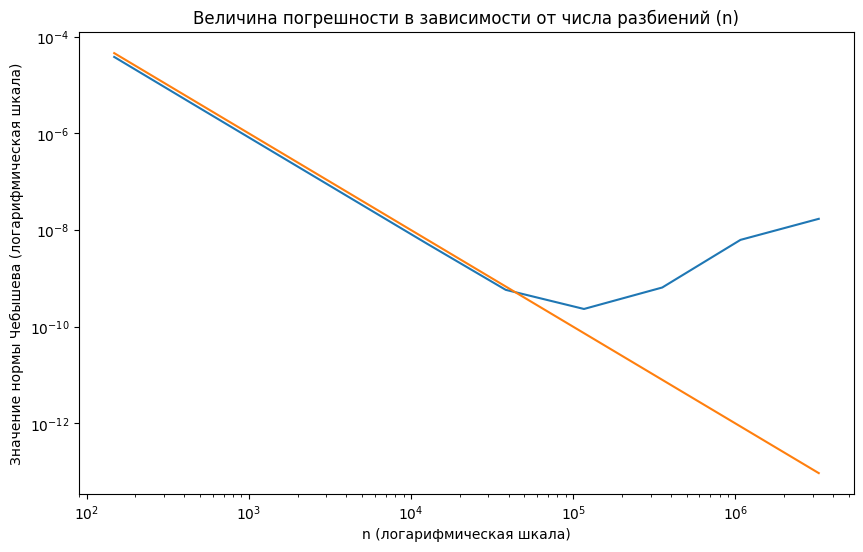

In [43]:
from tqdm import tqdm

n_values = np.int64(np.exp(np.linspace(5, 15, num=10)))
# n_values = [10]

k = [[1, 0], [1, 0]]
r = [0,  0]

differences = []

for N in tqdm(n_values):
    print(N)
    y_actual, x = solve(func, left=-np.pi/2, right=np.pi/2, k=k, r=r, N = N)
    y_expected = -np.cos(x)
    diff = max_norm(y_actual, y_expected)
    differences.append(diff)

    # plt.plot(x, y_actual, label="actual")
    # plt.plot(x, y_expected, label="expected")
    # plt.title(f"n: {N}, diff: {diff}")
    # plt.legend()
    # plt.show()

differences = np.array(differences)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_values, differences)
plt.plot(n_values, np.power(np.float32(n_values), -2))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (логарифмическая шкала)')
plt.ylabel('Значение нормы Чебышева (логарифмическая шкала)')
plt.title('Величина погрешности в зависимости от числа разбиений (n)')
plt.show()


  0%|          | 0/10 [00:00<?, ?it/s]

 60%|██████    | 6/10 [00:00<00:00, 31.97it/s]

148
450
1369
4160
12637
38390
116618
354256
1076137
3269017


100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


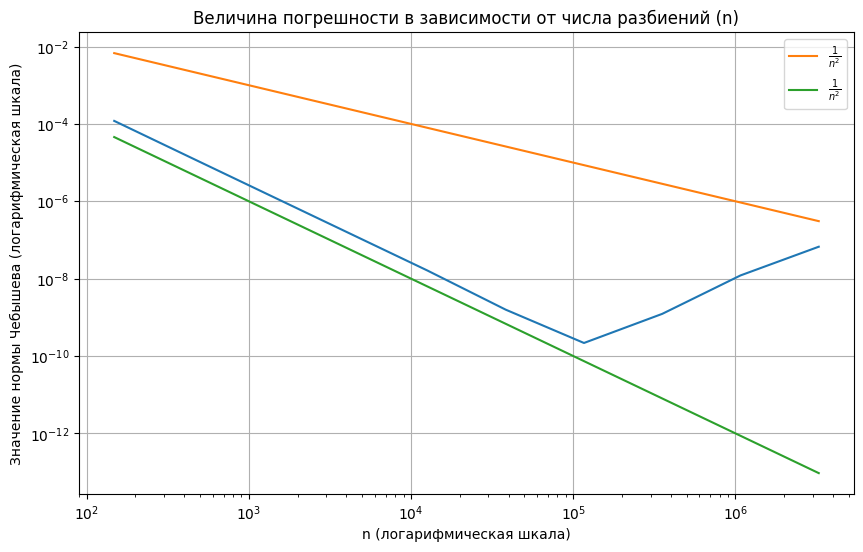

In [48]:
from tqdm import tqdm

n_values = np.int64(np.exp(np.linspace(5, 15, num=10)))
# n_values = [10]

k = [[1, 0], [0, 1]]
r = [0,  1]

differences = []

for N in tqdm(n_values):
    print(N)
    y_actual, x = solve(func, left=-np.pi/2, right=np.pi/2, k=k, r=r, N = N)
    y_expected = -np.cos(x)
    diff = max_norm(y_actual, y_expected)
    differences.append(diff)

    # plt.plot(x, y_actual, label="actual")
    # plt.plot(x, y_expected, label="expected")
    # plt.title(f"n: {N}, diff: {diff}")
    # plt.legend()
    # plt.show()

differences = np.array(differences)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_values, differences)
plt.plot(n_values, np.power(np.float32(n_values), -1), label=r"$\frac{1}{n^2}$")
plt.plot(n_values, np.power(np.float32(n_values), -2), label=r"$\frac{1}{n^2}$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (логарифмическая шкала)')
plt.ylabel('Значение нормы Чебышева (логарифмическая шкала)')
plt.title('Величина погрешности в зависимости от числа разбиений (n)')
plt.grid(True) 
plt.legend()
plt.show()
